In [1]:
from xml.dom import minidom
from imutils import paths
import numpy as np
import shutil
import json
import cv2
import os

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_dir(dirName):
    # Create a target directory & all intermediate 
    # directories if they don't exists
    
    if not os.path.exists(dirName):
        os.makedirs(dirName, exist_ok = True)
        print("[INFO] Directory " ,dirName,  " created")
    else:
        print("[INFO] Directory " ,dirName,  " already exists") 

In [3]:
# Get paths to images and xml labels

DATASET = "/workspace/original-external/animefaces"
imagesList = sorted(list(paths.list_images(DATASET)))
labelsList = sorted(list(paths.list_files(DATASET, validExts='xml')))
imagesList, labelsList

(['/workspace/original-external/animefaces/JPEGImages/000000.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000001.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000002.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000003.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000004.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000005.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000006.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000007.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000008.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000009.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000010.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000011.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000012.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000013.jpg',
  '/workspace/original-external/animefaces/JPEGImages/000014.j

In [4]:
def show_image(i):
    
    # Load and display the image
    image = cv2.imread(imagesList[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8), dpi=80)
    plt.imshow(image)
    
    # Read xml file
    file = minidom.parse(labelsList[i])    

    # Get the number of annotated faces on the image
    n = len(file.getElementsByTagName('object'))
    
    # Display bounding box for each image
    for i in range(n):
        xs = int(file.getElementsByTagName('xmin')[i].childNodes[0].data)
        ys = int(file.getElementsByTagName('ymin')[i].childNodes[0].data)
        xe = int(file.getElementsByTagName('xmax')[i].childNodes[0].data)
        ye = int(file.getElementsByTagName('ymax')[i].childNodes[0].data)

        ax = plt.gca()
        rect = patches.Rectangle((xs, ys), xe-xs, ye-ys, linewidth=1, edgecolor='r',facecolor='none')
        ax.add_patch(rect)

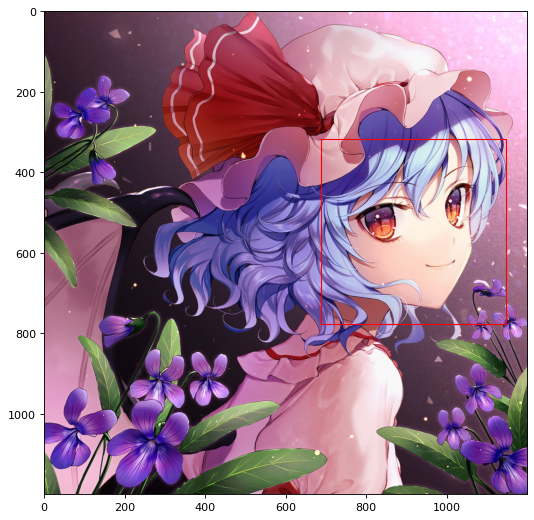

In [5]:
show_image(0)

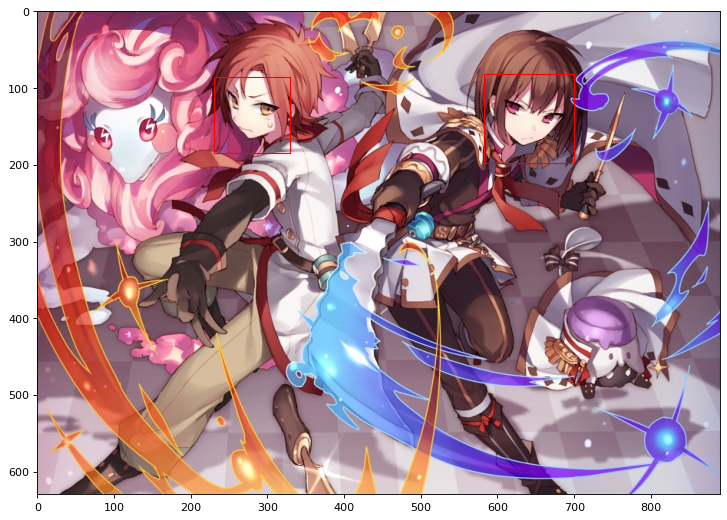

In [6]:
show_image(11)

In [7]:
# Create new directories for images and labels
NEW_DATASET = "/workspace/dataset/animefaces"
make_dir(os.path.join(NEW_DATASET, 'images'))
make_dir(os.path.join(NEW_DATASET, 'labels_eval'))

[INFO] Directory  /workspace/dataset/animefaces/images  created
[INFO] Directory  /workspace/dataset/animefaces/labels_eval  created


In [8]:
# Copy images
for imagePath in imagesList:
    des = os.path.join(NEW_DATASET, 'images', imagePath.split('/')[-1])
    shutil.copyfile(imagePath, des)

In [9]:
j = 1

for labelPath in labelsList:
    print("Processing: {}/{}".format(j, len(labelsList)))

    # Open a txt file to save labels
    labelFile = open("{}.txt".format(os.path.join(NEW_DATASET, 'labels_eval', labelPath.split('/')[-1].split('.')[0])), "a")

    # Read xml file
    file = minidom.parse(labelPath)    

    # Get the number of annotated faces on the image
    n = len(file.getElementsByTagName('object'))

    # Write bounding boxes to a txt file
    for i in range(n):
        xs = int(file.getElementsByTagName('xmin')[i].childNodes[0].data)
        ys = int(file.getElementsByTagName('ymin')[i].childNodes[0].data)
        xe = int(file.getElementsByTagName('xmax')[i].childNodes[0].data)
        ye = int(file.getElementsByTagName('ymax')[i].childNodes[0].data)

        labelFile.write('face {} {} {} {} -1 -1 -1 -1 -1 -1 -1 -1 -1 -1\n'.format(int(xs), int(ys), int(xe-xs), int(ye-ys)))

    labelFile.close()
    j += 1

Processing: 1/6641
Processing: 2/6641
Processing: 3/6641
Processing: 4/6641
Processing: 5/6641
Processing: 6/6641
Processing: 7/6641
Processing: 8/6641
Processing: 9/6641
Processing: 10/6641
Processing: 11/6641
Processing: 12/6641
Processing: 13/6641
Processing: 14/6641
Processing: 15/6641
Processing: 16/6641
Processing: 17/6641
Processing: 18/6641
Processing: 19/6641
Processing: 20/6641
Processing: 21/6641
Processing: 22/6641
Processing: 23/6641
Processing: 24/6641
Processing: 25/6641
Processing: 26/6641
Processing: 27/6641
Processing: 28/6641
Processing: 29/6641
Processing: 30/6641
Processing: 31/6641
Processing: 32/6641
Processing: 33/6641
Processing: 34/6641
Processing: 35/6641
Processing: 36/6641
Processing: 37/6641
Processing: 38/6641
Processing: 39/6641
Processing: 40/6641
Processing: 41/6641
Processing: 42/6641
Processing: 43/6641
Processing: 44/6641
Processing: 45/6641
Processing: 46/6641
Processing: 47/6641
Processing: 48/6641
Processing: 49/6641
Processing: 50/6641
Processin

Processing: 777/6641
Processing: 778/6641
Processing: 779/6641
Processing: 780/6641
Processing: 781/6641
Processing: 782/6641
Processing: 783/6641
Processing: 784/6641
Processing: 785/6641
Processing: 786/6641
Processing: 787/6641
Processing: 788/6641
Processing: 789/6641
Processing: 790/6641
Processing: 791/6641
Processing: 792/6641
Processing: 793/6641
Processing: 794/6641
Processing: 795/6641
Processing: 796/6641
Processing: 797/6641
Processing: 798/6641
Processing: 799/6641
Processing: 800/6641
Processing: 801/6641
Processing: 802/6641
Processing: 803/6641
Processing: 804/6641
Processing: 805/6641
Processing: 806/6641
Processing: 807/6641
Processing: 808/6641
Processing: 809/6641
Processing: 810/6641
Processing: 811/6641
Processing: 812/6641
Processing: 813/6641
Processing: 814/6641
Processing: 815/6641
Processing: 816/6641
Processing: 817/6641
Processing: 818/6641
Processing: 819/6641
Processing: 820/6641
Processing: 821/6641
Processing: 822/6641
Processing: 823/6641
Processing: 8

Processing: 1238/6641
Processing: 1239/6641
Processing: 1240/6641
Processing: 1241/6641
Processing: 1242/6641
Processing: 1243/6641
Processing: 1244/6641
Processing: 1245/6641
Processing: 1246/6641
Processing: 1247/6641
Processing: 1248/6641
Processing: 1249/6641
Processing: 1250/6641
Processing: 1251/6641
Processing: 1252/6641
Processing: 1253/6641
Processing: 1254/6641
Processing: 1255/6641
Processing: 1256/6641
Processing: 1257/6641
Processing: 1258/6641
Processing: 1259/6641
Processing: 1260/6641
Processing: 1261/6641
Processing: 1262/6641
Processing: 1263/6641
Processing: 1264/6641
Processing: 1265/6641
Processing: 1266/6641
Processing: 1267/6641
Processing: 1268/6641
Processing: 1269/6641
Processing: 1270/6641
Processing: 1271/6641
Processing: 1272/6641
Processing: 1273/6641
Processing: 1274/6641
Processing: 1275/6641
Processing: 1276/6641
Processing: 1277/6641
Processing: 1278/6641
Processing: 1279/6641
Processing: 1280/6641
Processing: 1281/6641
Processing: 1282/6641
Processing

Processing: 1760/6641
Processing: 1761/6641
Processing: 1762/6641
Processing: 1763/6641
Processing: 1764/6641
Processing: 1765/6641
Processing: 1766/6641
Processing: 1767/6641
Processing: 1768/6641
Processing: 1769/6641
Processing: 1770/6641
Processing: 1771/6641
Processing: 1772/6641
Processing: 1773/6641
Processing: 1774/6641
Processing: 1775/6641
Processing: 1776/6641
Processing: 1777/6641
Processing: 1778/6641
Processing: 1779/6641
Processing: 1780/6641
Processing: 1781/6641
Processing: 1782/6641
Processing: 1783/6641
Processing: 1784/6641
Processing: 1785/6641
Processing: 1786/6641
Processing: 1787/6641
Processing: 1788/6641
Processing: 1789/6641
Processing: 1790/6641
Processing: 1791/6641
Processing: 1792/6641
Processing: 1793/6641
Processing: 1794/6641
Processing: 1795/6641
Processing: 1796/6641
Processing: 1797/6641
Processing: 1798/6641
Processing: 1799/6641
Processing: 1800/6641
Processing: 1801/6641
Processing: 1802/6641
Processing: 1803/6641
Processing: 1804/6641
Processing

Processing: 2334/6641
Processing: 2335/6641
Processing: 2336/6641
Processing: 2337/6641
Processing: 2338/6641
Processing: 2339/6641
Processing: 2340/6641
Processing: 2341/6641
Processing: 2342/6641
Processing: 2343/6641
Processing: 2344/6641
Processing: 2345/6641
Processing: 2346/6641
Processing: 2347/6641
Processing: 2348/6641
Processing: 2349/6641
Processing: 2350/6641
Processing: 2351/6641
Processing: 2352/6641
Processing: 2353/6641
Processing: 2354/6641
Processing: 2355/6641
Processing: 2356/6641
Processing: 2357/6641
Processing: 2358/6641
Processing: 2359/6641
Processing: 2360/6641
Processing: 2361/6641
Processing: 2362/6641
Processing: 2363/6641
Processing: 2364/6641
Processing: 2365/6641
Processing: 2366/6641
Processing: 2367/6641
Processing: 2368/6641
Processing: 2369/6641
Processing: 2370/6641
Processing: 2371/6641
Processing: 2372/6641
Processing: 2373/6641
Processing: 2374/6641
Processing: 2375/6641
Processing: 2376/6641
Processing: 2377/6641
Processing: 2378/6641
Processing

Processing: 2898/6641
Processing: 2899/6641
Processing: 2900/6641
Processing: 2901/6641
Processing: 2902/6641
Processing: 2903/6641
Processing: 2904/6641
Processing: 2905/6641
Processing: 2906/6641
Processing: 2907/6641
Processing: 2908/6641
Processing: 2909/6641
Processing: 2910/6641
Processing: 2911/6641
Processing: 2912/6641
Processing: 2913/6641
Processing: 2914/6641
Processing: 2915/6641
Processing: 2916/6641
Processing: 2917/6641
Processing: 2918/6641
Processing: 2919/6641
Processing: 2920/6641
Processing: 2921/6641
Processing: 2922/6641
Processing: 2923/6641
Processing: 2924/6641
Processing: 2925/6641
Processing: 2926/6641
Processing: 2927/6641
Processing: 2928/6641
Processing: 2929/6641
Processing: 2930/6641
Processing: 2931/6641
Processing: 2932/6641
Processing: 2933/6641
Processing: 2934/6641
Processing: 2935/6641
Processing: 2936/6641
Processing: 2937/6641
Processing: 2938/6641
Processing: 2939/6641
Processing: 2940/6641
Processing: 2941/6641
Processing: 2942/6641
Processing

Processing: 3486/6641
Processing: 3487/6641
Processing: 3488/6641
Processing: 3489/6641
Processing: 3490/6641
Processing: 3491/6641
Processing: 3492/6641
Processing: 3493/6641
Processing: 3494/6641
Processing: 3495/6641
Processing: 3496/6641
Processing: 3497/6641
Processing: 3498/6641
Processing: 3499/6641
Processing: 3500/6641
Processing: 3501/6641
Processing: 3502/6641
Processing: 3503/6641
Processing: 3504/6641
Processing: 3505/6641
Processing: 3506/6641
Processing: 3507/6641
Processing: 3508/6641
Processing: 3509/6641
Processing: 3510/6641
Processing: 3511/6641
Processing: 3512/6641
Processing: 3513/6641
Processing: 3514/6641
Processing: 3515/6641
Processing: 3516/6641
Processing: 3517/6641
Processing: 3518/6641
Processing: 3519/6641
Processing: 3520/6641
Processing: 3521/6641
Processing: 3522/6641
Processing: 3523/6641
Processing: 3524/6641
Processing: 3525/6641
Processing: 3526/6641
Processing: 3527/6641
Processing: 3528/6641
Processing: 3529/6641
Processing: 3530/6641
Processing

Processing: 4043/6641
Processing: 4044/6641
Processing: 4045/6641
Processing: 4046/6641
Processing: 4047/6641
Processing: 4048/6641
Processing: 4049/6641
Processing: 4050/6641
Processing: 4051/6641
Processing: 4052/6641
Processing: 4053/6641
Processing: 4054/6641
Processing: 4055/6641
Processing: 4056/6641
Processing: 4057/6641
Processing: 4058/6641
Processing: 4059/6641
Processing: 4060/6641
Processing: 4061/6641
Processing: 4062/6641
Processing: 4063/6641
Processing: 4064/6641
Processing: 4065/6641
Processing: 4066/6641
Processing: 4067/6641
Processing: 4068/6641
Processing: 4069/6641
Processing: 4070/6641
Processing: 4071/6641
Processing: 4072/6641
Processing: 4073/6641
Processing: 4074/6641
Processing: 4075/6641
Processing: 4076/6641
Processing: 4077/6641
Processing: 4078/6641
Processing: 4079/6641
Processing: 4080/6641
Processing: 4081/6641
Processing: 4082/6641
Processing: 4083/6641
Processing: 4084/6641
Processing: 4085/6641
Processing: 4086/6641
Processing: 4087/6641
Processing

Processing: 4518/6641
Processing: 4519/6641
Processing: 4520/6641
Processing: 4521/6641
Processing: 4522/6641
Processing: 4523/6641
Processing: 4524/6641
Processing: 4525/6641
Processing: 4526/6641
Processing: 4527/6641
Processing: 4528/6641
Processing: 4529/6641
Processing: 4530/6641
Processing: 4531/6641
Processing: 4532/6641
Processing: 4533/6641
Processing: 4534/6641
Processing: 4535/6641
Processing: 4536/6641
Processing: 4537/6641
Processing: 4538/6641
Processing: 4539/6641
Processing: 4540/6641
Processing: 4541/6641
Processing: 4542/6641
Processing: 4543/6641
Processing: 4544/6641
Processing: 4545/6641
Processing: 4546/6641
Processing: 4547/6641
Processing: 4548/6641
Processing: 4549/6641
Processing: 4550/6641
Processing: 4551/6641
Processing: 4552/6641
Processing: 4553/6641
Processing: 4554/6641
Processing: 4555/6641
Processing: 4556/6641
Processing: 4557/6641
Processing: 4558/6641
Processing: 4559/6641
Processing: 4560/6641
Processing: 4561/6641
Processing: 4562/6641
Processing

Processing: 5386/6641
Processing: 5387/6641
Processing: 5388/6641
Processing: 5389/6641
Processing: 5390/6641
Processing: 5391/6641
Processing: 5392/6641
Processing: 5393/6641
Processing: 5394/6641
Processing: 5395/6641
Processing: 5396/6641
Processing: 5397/6641
Processing: 5398/6641
Processing: 5399/6641
Processing: 5400/6641
Processing: 5401/6641
Processing: 5402/6641
Processing: 5403/6641
Processing: 5404/6641
Processing: 5405/6641
Processing: 5406/6641
Processing: 5407/6641
Processing: 5408/6641
Processing: 5409/6641
Processing: 5410/6641
Processing: 5411/6641
Processing: 5412/6641
Processing: 5413/6641
Processing: 5414/6641
Processing: 5415/6641
Processing: 5416/6641
Processing: 5417/6641
Processing: 5418/6641
Processing: 5419/6641
Processing: 5420/6641
Processing: 5421/6641
Processing: 5422/6641
Processing: 5423/6641
Processing: 5424/6641
Processing: 5425/6641
Processing: 5426/6641
Processing: 5427/6641
Processing: 5428/6641
Processing: 5429/6641
Processing: 5430/6641
Processing

Processing: 5960/6641
Processing: 5961/6641
Processing: 5962/6641
Processing: 5963/6641
Processing: 5964/6641
Processing: 5965/6641
Processing: 5966/6641
Processing: 5967/6641
Processing: 5968/6641
Processing: 5969/6641
Processing: 5970/6641
Processing: 5971/6641
Processing: 5972/6641
Processing: 5973/6641
Processing: 5974/6641
Processing: 5975/6641
Processing: 5976/6641
Processing: 5977/6641
Processing: 5978/6641
Processing: 5979/6641
Processing: 5980/6641
Processing: 5981/6641
Processing: 5982/6641
Processing: 5983/6641
Processing: 5984/6641
Processing: 5985/6641
Processing: 5986/6641
Processing: 5987/6641
Processing: 5988/6641
Processing: 5989/6641
Processing: 5990/6641
Processing: 5991/6641
Processing: 5992/6641
Processing: 5993/6641
Processing: 5994/6641
Processing: 5995/6641
Processing: 5996/6641
Processing: 5997/6641
Processing: 5998/6641
Processing: 5999/6641
Processing: 6000/6641
Processing: 6001/6641
Processing: 6002/6641
Processing: 6003/6641
Processing: 6004/6641
Processing

Processing: 6509/6641
Processing: 6510/6641
Processing: 6511/6641
Processing: 6512/6641
Processing: 6513/6641
Processing: 6514/6641
Processing: 6515/6641
Processing: 6516/6641
Processing: 6517/6641
Processing: 6518/6641
Processing: 6519/6641
Processing: 6520/6641
Processing: 6521/6641
Processing: 6522/6641
Processing: 6523/6641
Processing: 6524/6641
Processing: 6525/6641
Processing: 6526/6641
Processing: 6527/6641
Processing: 6528/6641
Processing: 6529/6641
Processing: 6530/6641
Processing: 6531/6641
Processing: 6532/6641
Processing: 6533/6641
Processing: 6534/6641
Processing: 6535/6641
Processing: 6536/6641
Processing: 6537/6641
Processing: 6538/6641
Processing: 6539/6641
Processing: 6540/6641
Processing: 6541/6641
Processing: 6542/6641
Processing: 6543/6641
Processing: 6544/6641
Processing: 6545/6641
Processing: 6546/6641
Processing: 6547/6641
Processing: 6548/6641
Processing: 6549/6641
Processing: 6550/6641
Processing: 6551/6641
Processing: 6552/6641
Processing: 6553/6641
Processing